## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create a simple letter image

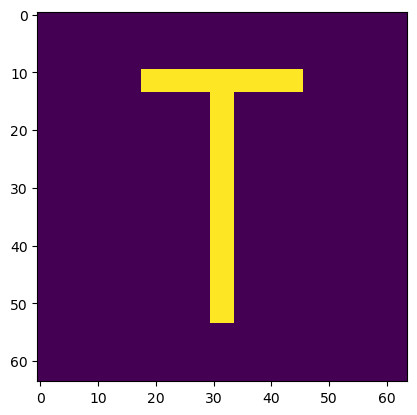

In [6]:
# Image size
H, W = 64, 64

# Background = -1 (black), foreground = +1 (white)
x0 = -np.ones((H, W), dtype=np.float32)

# Draw a sample 'T'
x0[10:54, 30:34] = 1.0  # vertical stroke
x0[10:14, 18:46] = 1.0  # top stroke

# Plot the image
plt.imshow(x0);

## Define the diffusion schedule (beta & alpha)

In [8]:
T = 100 # number of diffusion steps

# IMPORTANT: beta must be in (0, 1)
beta = np.linspace(0.01, 0.30, T).astype(np.float32)

# α = √(1 − β²)
alpha = np.sqrt(1.0 - beta**2).astype(np.float32)

## Step-by-step forward diffusion (Markov process)

In [ ]:
xt = x0.copy()
snapshots = {0: x0.copy()}

keep_steps = [1, 5, 10, 20, 40, 60, 80, 100]

for i in range(1, T + 1):
    b = beta[i - 1]
    a = alpha[i - 1]
    
    z = np.random.randn(H, W).astype(np.float32) # z_i ~ N(0, I)
    xt = a * xt + b * z
    
    if i in keep_steps:
        snapshots[i] = xt.copy()

## Visualize how it becomes noise

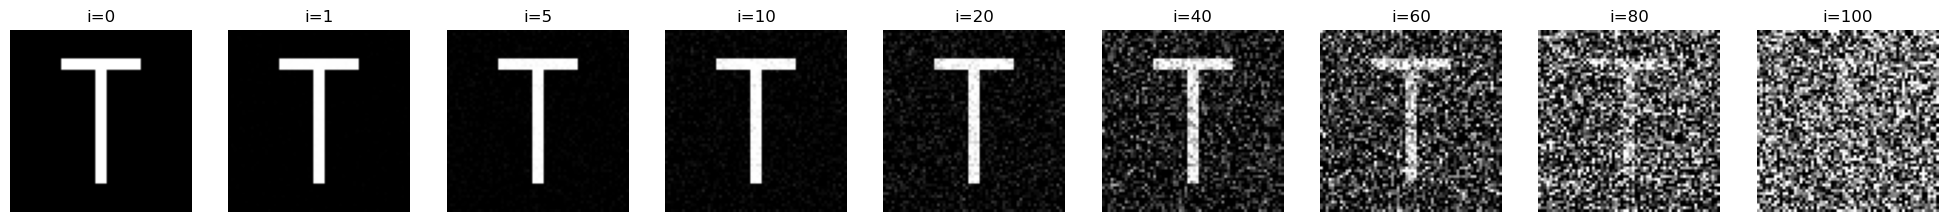

In [15]:
steps = sorted(snapshots.keys())

plt.figure(figsize=(2.2 * len(steps), 2.2))
for k, t in enumerate(steps):
    ax = plt.subplot(1, len(steps), k + 1)
    ax.imshow(np.clip(snapshots[t], -1, 1), cmap="gray", vmin=-1, vmax=1)
    ax.set_title(f"i={t}")
    ax.axis("off")
    
plt.tight_layout()
plt.show()